In [263]:
from numpy import NaN, NAN, nan
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt

os.chdir(r"C:\Users\uoo13\Desktop\GJ_AI\수업 자료\data_file")

df = pd.read_csv('PatientInfo.csv')
df2 = pd.read_csv('PatientRoute.csv')

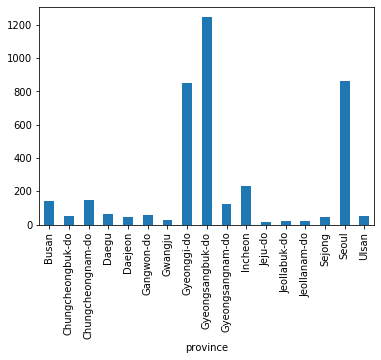

In [289]:
#지역별 감염자수 통계 및 시각화
subset = df[['patient_id','province']]

province_infection_count = subset.groupby('province')['patient_id'].nunique()
province_infection_count.plot(kind = 'bar')
plt.show()

In [313]:
print(province_infection_count)

province
Busan                 144
Chungcheongbuk-do      52
Chungcheongnam-do     146
Daegu                  63
Daejeon                46
Gangwon-do             55
Gwangju                30
Gyeonggi-do           853
Gyeongsangbuk-do     1245
Gyeongsangnam-do      122
Incheon               232
Jeju-do                14
Jeollabuk-do           21
Jeollanam-do           19
Sejong                 47
Seoul                 863
Ulsan                  52
Name: patient_id, dtype: int64


age                       object
confirmed_date    datetime64[ns]
released_date     datetime64[ns]
dtype: object
age                       object
confirmed_date    datetime64[ns]
released_date     datetime64[ns]
recovery_days              int32
dtype: object


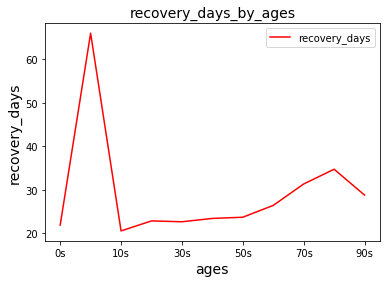

In [261]:
#나이별 완치기간 통계 및 시각화
subset2 = df.dropna(subset = ['age','confirmed_date', 'released_date'])
subset2 = subset2[['age','confirmed_date', 'released_date']]

subset2['confirmed_date'] = pd.to_datetime(subset2['confirmed_date'], format="%Y-%m-%d")
subset2['released_date'] = pd.to_datetime(subset2['released_date'], format="%Y-%m-%d")
print(subset2.dtypes)
subset2['recovery_days'] = (subset2['released_date'] - subset2['confirmed_date'])
subset2['recovery_days'] = subset2['recovery_days'].dt.days.astype('int32')
print(subset2.dtypes)
recovery_days_by_ages = subset2.groupby('age')['recovery_days'].mean()

recovery_days_by_ages.plot(color = 'red')
plt.title('recovery_days_by_ages', fontsize = '14')
plt.xlabel('ages',fontsize = '14')
plt.ylabel('recovery_days',fontsize = '14')
plt.legend(loc=0)


C:\Users\uoo13\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'upper roght'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


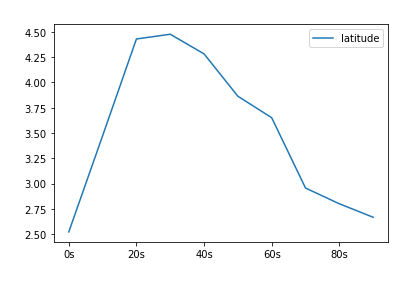

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

In [312]:
subset3 = df[['patient_id', 'age']]
move_count = df2.groupby('patient_id')['latitude'].nunique()
subset3 = pd.merge(subset3,df2.groupby('patient_id')['latitude'].nunique(),\
                  how ='inner',
                  on = 'patient_id')
move_count_by_ages = subset3.groupby('age')['latitude'].mean()
move_count_by_ages.plot()
plt.title('Move_count_by_ages', fontsize= 15, color = 'white')
plt.xlabel('Ages', fontsize = 12, color = 'white')
plt.ylabel('Avg_move_count', fontsize = 12, color = 'white')
plt.legend(loc='upper roght')
plt.show()


age
0s       60
100s      1
10s     160
20s     860
30        1
30s     493
40s     483
50s     625
60s     423
70s     210
80s     162
90s      47
Name: patient_id, dtype: int64

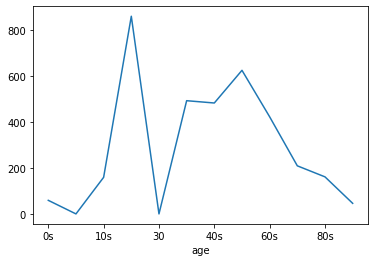

In [318]:
subset4 = df.dropna(subset = ['age','patient_id'])
subset4 = subset4[['age', 'patient_id']]

confirmed_count_by_age = subset4.groupby('age')['patient_id'].nunique()
confirmed_count_by_age.plot()
confirmed_count_by_age